In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from scipy import interp

In [2]:
df = pd.read_csv('gene_data_ct.csv')

In [3]:
df.head()

,Unnamed: 0,geneID1,geneID2,sequence1,sequence2,interaction,Sequence_x,CT_x,0_x,1_x,...,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y
0,0,PA1165,PA2424,ATGCGCGCCATGAACGACCGTCTCCCCTCCTTCTGCACCCCGCTGG...,ATGATGGACGCCTTCGAACTTCCCACCACCCTGGTCCAGGCCCTGC...,1,ATGCGCGCCATGAACGACCGTCTCCCCTCCTTCTGCACCCCGCTGG...,"[0.03773584905660377, 0.018867924528301886, 0....",0.037736,0.018868,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
1,1,PA4520,PA2424,GTGAAGACCGTACTCTATCCCGCCATCGCGCTGATGAACCGGCTCA...,ATGATGGACGCCTTCGAACTTCCCACCACCCTGGTCCAGGCCCTGC...,0,GTGAAGACCGTACTCTATCCCGCCATCGCGCTGATGAACCGGCTCA...,"[0.08080808080808081, 0.10101010101010101, 0.2...",0.080808,0.101010,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
2,2,PA1266,PA2424,ATGAGCGCCGACTACGACCTGCTGATCGTCGGTGCCGGCCCCGCCG...,ATGATGGACGCCTTCGAACTTCCCACCACCCTGGTCCAGGCCCTGC...,0,ATGAGCGCCGACTACGACCTGCTGATCGTCGGTGCCGGCCCCGCCG...,"[0.0, 0.0392156862745098, 0.0784313725490196, ...",0.000000,0.039216,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
3,3,PA3585,PA2424,ATGTTCAAGGCGCTGATCGGCGCCGCCGTGGTCGTGCTCCTCGCCG...,ATGATGGACGCCTTCGAACTTCCCACCACCCTGGTCCAGGCCCTGC...,0,ATGTTCAAGGCGCTGATCGGCGCCGCCGTGGTCGTGCTCCTCGCCG...,"[0.0, 0.0, 0.2631578947368421, 0.0526315789473...",0.000000,0.000000,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
4,4,PA2399,PA2424,GTGCAAGCACTCATAGAGAAGGTGGGCTCCCTTTCCCCCCAGGAAA...,ATGATGGACGCCTTCGAACTTCCCACCACCCTGGTCCAGGCCCTGC...,1,GTGCAAGCACTCATAGAGAAGGTGGGCTCCCTTTCCCCCCAGGAAA...,"[0.04559270516717325, 0.060790273556231005, 0....",0.045593,0.060790,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687


In [4]:
df_modeling = df.drop(['Unnamed: 0', 'geneID1', 'geneID2', 'sequence1', 'sequence2','Sequence_x', 'CT_x', 'Sequence_y', 'CT_y'], axis=1)
df_modeling.head()

,interaction,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y
0,1,0.037736,0.018868,0.132075,0.150943,0.018868,0.018868,0.132075,0.094340,0.037736,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
1,0,0.080808,0.101010,0.222222,0.262626,0.070707,0.030303,0.222222,0.454545,0.272727,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
2,0,0.000000,0.039216,0.078431,0.117647,0.019608,0.009804,0.088235,0.068627,0.068627,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
3,0,0.000000,0.000000,0.263158,0.052632,0.000000,0.052632,0.105263,0.368421,0.157895,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687
4,1,0.045593,0.060790,0.179331,0.273556,0.072948,0.063830,0.227964,0.334347,0.127660,...,0.731259,0.205092,0.647808,0.25884,0.639321,0.998586,0.321075,0.454031,0.770863,0.302687


In [5]:
X = df_modeling.drop('interaction', axis=1)
y = df_modeling['interaction']
print X.head()
print y.head()

        0_x       1_x       2_x       3_x       4_x       5_x       6_x  \
0  0.037736  0.018868  0.132075  0.150943  0.018868  0.018868  0.132075   
1  0.080808  0.101010  0.222222  0.262626  0.070707  0.030303  0.222222   
2  0.000000  0.039216  0.078431  0.117647  0.019608  0.009804  0.088235   
3  0.000000  0.000000  0.263158  0.052632  0.000000  0.052632  0.105263   
4  0.045593  0.060790  0.179331  0.273556  0.072948  0.063830  0.227964   

        7_x       8_x       9_x    ...         54_y      55_y      56_y  \
0  0.094340  0.037736  0.056604    ...     0.731259  0.205092  0.647808   
1  0.454545  0.272727  0.191919    ...     0.731259  0.205092  0.647808   
2  0.068627  0.068627  0.009804    ...     0.731259  0.205092  0.647808   
3  0.368421  0.157895  0.000000    ...     0.731259  0.205092  0.647808   
4  0.334347  0.127660  0.148936    ...     0.731259  0.205092  0.647808   

      57_y      58_y      59_y      60_y      61_y      62_y      63_y  
0  0.25884  0.639321  0.9

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(25944, 128)

In [8]:
X_test.shape

(6486, 128)

In [9]:
y_train.shape

(25944,)

In [10]:
clf1 = LogisticRegression(random_state=123)
clf2 = RandomForestClassifier(random_state=123)
clf3 = GaussianNB()
clf4 = svm.SVC(kernel='rbf', C=0.1)

In [24]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft',
                        weights=[1, 1, 1])

In [15]:
clf2.fit(X_train, y_train)
print clf2.decision_path(X_train)
# probas_clf2 = clf2.predict(X_test)

(<25944x40326 sparse matrix of type '<type 'numpy.int64'>'
	with 4647409 stored elements in Compressed Sparse Row format>, array([    0,  3889,  8070, 11933, 15998, 20389, 24150, 28139, 32268,
       36179, 40326]))


In [31]:
ntest = y_test.shape
y_clf2 = np.zeros((ntest))
ids = np.where(probas_clf2>0.5)
y_clf2[ids] = 1
accuracy_score(y_test, y_clf2)

0.93740363860622877

In [17]:
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (clf1, clf2, clf3, eclf)]

AttributeError: predict_proba is not available when  probability=False

In [ ]:
probas_clf1 = probas[0]
print probas_clf1
ntest = y_test.shape
print probas_clf1[:,1]

In [ ]:
y_clf1 = np.zeros((ntest))
ids = np.where(probas_clf1[:,1]>0.5)
y_clf1[ids] = 1
print y_clf1

In [16]:
accuracy_score(y_test, y_clf1)

0.69811902559358618

In [17]:
probas_clf2 = probas[1]
# print probas_clf2
# print probas_clf2[:,1]
y_clf2 = np.zeros((ntest))
ids = np.where(probas_clf2[:,1]>0.5)
y_clf2[ids] = 1
# print y_clf2
accuracy_score(y_test, y_clf2)

0.93092815294480424

In [18]:
probas_clf3 = probas[2]
# print probas_clf3
# print probas_clf3[:,1]
y_clf3 = np.zeros((ntest))
ids = np.where(probas_clf3[:,1]>0.5)
y_clf3[ids] = 1
# print y_clf3
accuracy_score(y_test, y_clf3)

0.63737280296022203

In [ ]:
probas_clf4 = probas[3]
# print probas_clf3
# print probas_clf3[:,1]
y_clf4 = np.zeros((ntest))
ids = np.where(probas_clf4[:,1]>0.5)
y_clf4[ids] = 1
# print y_clf3
accuracy_score(y_test, y_clf4)

In [19]:
probas_eclf = probas[4]
# print probas_clf3
# print probas_clf3[:,1]
y_eclf = np.zeros((ntest))
ids = np.where(probas_eclf[:,1]>0.5)
y_eclf[ids] = 1
# print y_clf3
accuracy_score(y_test, y_eclf)

0.72772124576009867

In [20]:
# get class probabilities for the first sample in the dataset
class1_1 = [pr[1, 0] for pr in probas]
print class1_1
class2_1 = [pr[1, 1] for pr in probas]
print class2_1

[0.33059743587241675, 0.80000000000000004, 0.053248423100838396, 0.39461528632441834]
[0.66940256412758325, 0.20000000000000001, 0.94675157689915779, 0.60538471367558033]


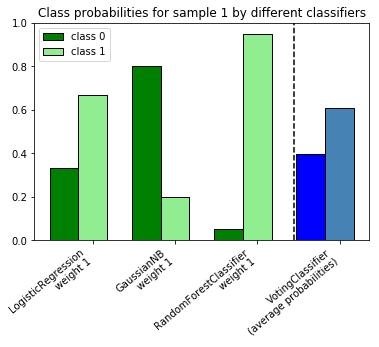

In [21]:
# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 1',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 0', 'class 1'], loc='upper left')
plt.show()

### Doing stratified k fold cross validation for each classifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print X_train.head()
# print y_train.head()
print X_train.shape
print y_train.shape

(25944, 128)
(25944,)


In [23]:
Xmat = X_train.as_matrix()
ymat = y_train.as_matrix()
print Xmat.shape
print ymat.shape

(25944, 128)
(25944,)


In [24]:
XTestMat = X_test.as_matrix()
print XTestMat.shape
print y_test.shape
yTestMat = y_test.as_matrix()

(6486, 128)
(6486,)


(5190, 2)
(5190,)
0.925818882466
(5189, 2)
(5189,)
0.929080747736
(5189, 2)
(5189,)
0.916939680093
(5188, 2)
(5188,)
0.925019275251
(5188, 2)
(5188,)
0.928874325366


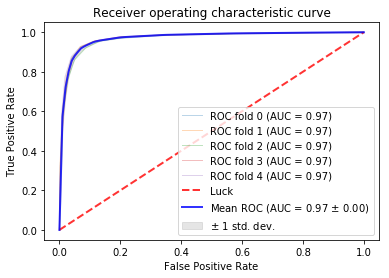

In [25]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
# cv = KFold(n_splits=6)
# clf5 = LogisticRegression(random_state=42)
clf5 = RandomForestClassifier(random_state=42)
# clf5 = GaussianNB()
# clf5 = svm.SVC(kernel='linear', probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train, test in cv.split(Xmat, ymat):
#     print train.shape
#     print test.shape
#     print("TRAIN:", train, "TEST:", test)
#     X_train, X_test = Xmat[train], Xmat[test]
#     y_train, y_test = ymat[train], ymat[test]
#     y[train]
#     clf5.fit(X, y)
    model = clf5.fit(Xmat[train], ymat[train])
    probas_ = model.predict_proba(Xmat[test])
    print probas_.shape
    
    ## Get accuracy:
    print ymat[test].shape
    ymat_test = np.zeros((ymat[test].shape))
    ids = np.where(probas_[:,1]>0.5)
    ymat_test[ids] = 1
    acc = accuracy_score(ymat_test, ymat[test])
    print acc
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(ymat[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


In [26]:
print fpr, tpr, thresholds

[ 0.          0.00267994  0.00267994  0.00765697  0.01837672  0.01837672
  0.03943338  0.06967841  0.11715161  0.19793262  0.33652374  0.55589587
  0.55666156  0.81546708  1.        ] [ 0.          0.29697205  0.29736025  0.59045031  0.77329193  0.77368012
  0.87694099  0.92740683  0.95652174  0.97593168  0.98718944  0.99572981
  0.99572981  0.9988354   1.        ] [ 2.          1.          0.93333333  0.9         0.8         0.75        0.7
  0.6         0.5         0.4         0.3         0.2         0.14        0.1
  0.        ]


In [27]:
predicted = cross_val_predict(clf5, Xmat, ymat, cv=5)
metrics.accuracy_score(ymat, predicted) 

0.92514646931853217

In [28]:
clf5

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Comparing various models:

LogisticRegression
RandomForest
GaussianNB


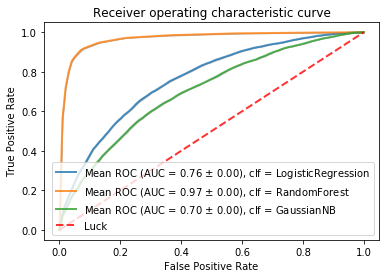

In [30]:
classifiers = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), GaussianNB()]
cv = StratifiedKFold(n_splits=5)
cl_names = ["LogisticRegression", 'RandomForest', 'GaussianNB']

cl_num = 0
for cl in classifiers:
    tprs = []
    aucs = []
    print cl_names[cl_num]
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    for train, test in cv.split(Xmat, ymat):
        model = cl.fit(Xmat[train], ymat[train])
        probas_ = model.predict_proba(Xmat[test])
        probas2 = model.predict_proba(XTestMat)
#         print probas_.shape

        ## Get accuracy:
#         print ymat[test].shape
        ymat_test = np.zeros((ymat[test].shape))
        ids = np.where(probas_[:,1]>0.5)
        ymat_test[ids] = 1
        acc = accuracy_score(ymat_test, ymat[test])
#         print "accuracy = " + str(acc)
        # Compute ROC curve and area the curve
#         fpr, tpr, thresholds = roc_curve(ymat[test], probas_[:, 1])
        fpr, tpr, thresholds = roc_curve(yTestMat, probas2[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f), clf = %s' % (mean_auc, std_auc, cl_names[cl_num]),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.4)
    cl_num += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [ ]:
classifiers = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), GaussianNB()]
cv = StratifiedKFold(n_splits=5)
cl_names = ["LogisticRegression", 'RandomForest', 'GaussianNB']

cl_num = 0
for cl in classifiers:
    tprs = []
    aucs = []
    print cl_names[cl_num]
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    for train, test in cv.split(Xmat, ymat):
        model = cl.fit(Xmat[train], ymat[train])
        probas_ = model.predict_proba(Xmat[test])
#         probas2 = model.predict_proba(XTestMat)
#         print probas_.shape

        ## Get accuracy:
#         print ymat[test].shape
        ymat_test = np.zeros((ymat[test].shape))
        ids = np.where(probas_[:,1]>0.5)
        ymat_test[ids] = 1
        acc = accuracy_score(ymat_test, ymat[test])
#         print "accuracy = " + str(acc)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(ymat[test], probas_[:, 1])
#         fpr, tpr, thresholds = roc_curve(yTestMat, probas2[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f), clf = %s' % (mean_auc, std_auc, cl_names[cl_num]),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.4)
    cl_num += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

50
51
52
53
54
55
50
51
52
53
54
55


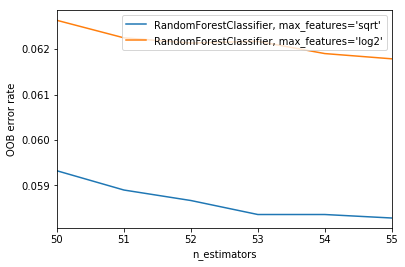

In [30]:
from collections import OrderedDict
RANDOM_STATE = 42
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
]
# ("RandomForestClassifier, max_features=None",
#         RandomForestClassifier(warm_start=True, max_features=None,
#                                oob_score=True,
#                                random_state=RANDOM_STATE))

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 55

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        print i
        clf.set_params(n_estimators=i)
        clf.fit(Xmat, ymat)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()
